In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
import seaborn as sns

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.metrics import CategoricalAccuracy

from io_functions import read_data

In [3]:
x_train, y_train = read_data("dataset/train", flatten_controller = False, image_size = 128)
x_test, y_test = read_data("dataset/test", flatten_controller = False, image_size = 128)

y_train = LabelBinarizer().fit(range(max(y_train)+1)).transform(y_train)
y_test = LabelBinarizer().fit(range(max(y_test)+1)).transform(y_test)

x_train.shape, y_train.shape , x_test.shape, y_test.shape

((21901, 128, 128, 3), (21901, 9), (5476, 128, 128, 3), (5476, 9))

In [4]:
def create_model():
    model = Sequential()

    model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(4,4), padding='valid', activation='relu', input_shape=(128,128,3)))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    
    model.add(Conv2D(filters=96, kernel_size=(5,5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    
    model.add(Flatten())    
    model.add(Dense(250, activation='relu'))
    model.add(Dropout(0.4))

    model.add(Dense(9, activation='softmax'))

    return model

In [5]:
optimizer = Adam()
loss_func = categorical_crossentropy

model = create_model()

model.summary()

model.compile(loss = loss_func, optimizer = optimizer, metrics = CategoricalAccuracy())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 96)        153696    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 96)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         110720    
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          7

In [6]:
history = model.fit(x_train, y_train, epochs=30)

Epoch 1/30
685/685 [==============================] - 10s 7ms/step - loss: 1.9478 - categorical_accuracy: 0.3743
Epoch 2/30
685/685 [==============================] - 4s 6ms/step - loss: 1.4764 - categorical_accuracy: 0.4691
Epoch 3/30
685/685 [==============================] - 4s 6ms/step - loss: 1.3296 - categorical_accuracy: 0.5223
Epoch 4/30
685/685 [==============================] - 4s 6ms/step - loss: 1.2747 - categorical_accuracy: 0.5413
Epoch 5/30
685/685 [==============================] - 4s 6ms/step - loss: 1.1998 - categorical_accuracy: 0.5684
Epoch 6/30
685/685 [==============================] - 4s 6ms/step - loss: 1.1533 - categorical_accuracy: 0.5874
Epoch 7/30
685/685 [==============================] - 4s 6ms/step - loss: 1.1369 - categorical_accuracy: 0.5976
Epoch 8/30
685/685 [==============================] - 4s 6ms/step - loss: 1.0979 - categorical_accuracy: 0.6110
Epoch 9/30
685/685 [==============================] - 4s 6ms/step - loss: 1.0697 - categorical_accuracy

Text(0, 0.5, 'Loss')

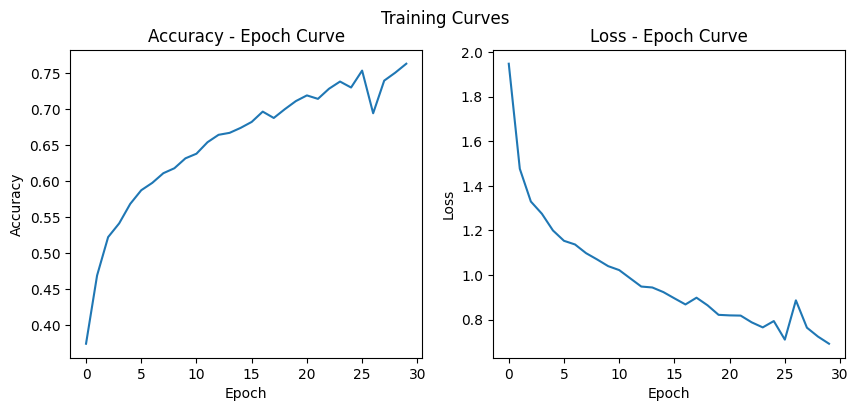

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('Training Curves')

ax1.plot(history.history["categorical_accuracy"])
ax1.set_title("Accuracy - Epoch Curve")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")

ax2.plot(history.history["loss"])
ax2.set_title("Loss - Epoch Curve")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")

172/172 [==============================] - 1s 4ms/step


Text(50.722222222222214, 0.5, 'True')

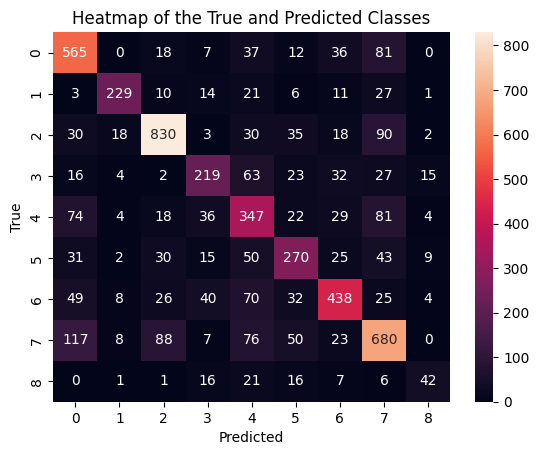

In [8]:
y_pred = model.predict(x_test)
y_pred = np.argmax (y_pred, axis = 1)

y_testt = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_testt, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, fmt='.3g')

plt.title("Heatmap of the True and Predicted Classes")
plt.xlabel("Predicted")
plt.ylabel("True")

In [12]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss = {loss}")
print(f"Test Accuracy = {accuracy}")

172/172 [==============================] - 1s 4ms/step - loss: 1.2432 - categorical_accuracy: 0.6611
Test Loss = 1.2431577444076538
Test Accuracy = 0.661066472530365
